### Introduction:

**This report aims to show some insights from analyzing data of a Twitter account named WeRateDogs.**

In [1]:
# @hidden_cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('twitter_archive_master.csv')

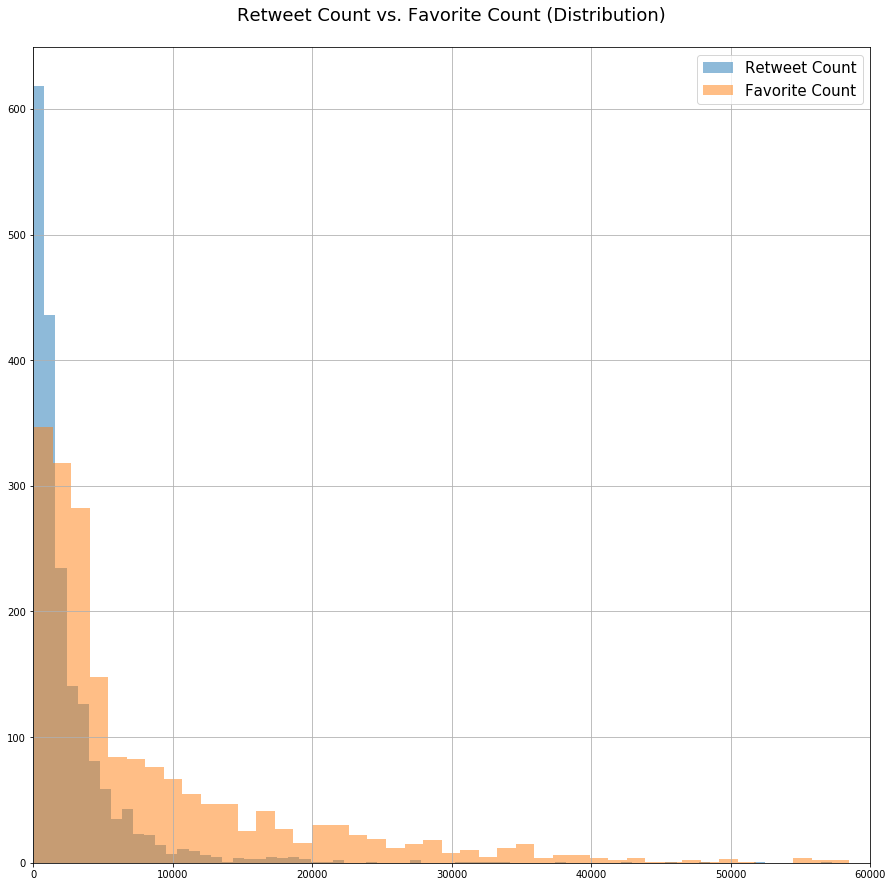

In [3]:
plt.figure(figsize=(15,15))
df.retweet_count.hist(alpha=0.5, bins=100, label='Retweet Count')
df.favorite_count.hist(alpha=0.5, bins=100, label='Favorite Count')
plt.title('Retweet Count vs. Favorite Count (Distribution)\n', size = 18)
plt.legend(loc='upper right', fontsize = 15)
plt.xlim(0,60000)
plt.show()

Looking at the histogram above, we note that the distribution of both retweets and favorite is significantly right-skewed, however, the mean of favorite count (8895.7) is greater than retweet count (2766.7). We also note that the maximum number of favorite a tweet received was 132,810, where the maximum number of retweets a tweet received was 79,515.

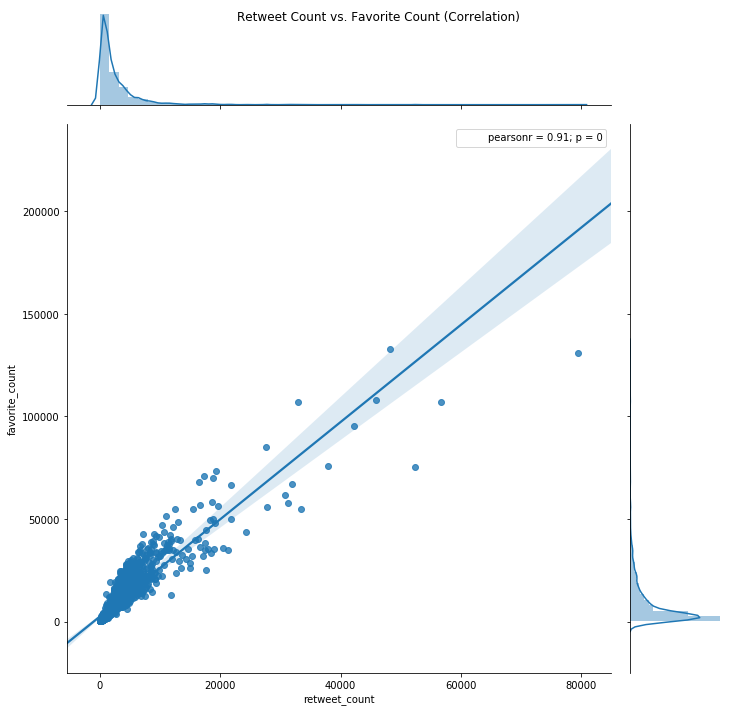

In [4]:
p = sns.jointplot(x=df.retweet_count,y=df.favorite_count, size=10, kind='reg');
p.fig.suptitle('Retweet Count vs. Favorite Count (Correlation)\n');

Looking at the plot above, we note there is a positive correlation between the favorite_count and the retweet_count. In other words, as the number of retweet increases and the number of favorites increases as well, which is expected as most people who would mark a tweet as favorite are likely to retweet that tweet.

Text(0,0.5,'Count')

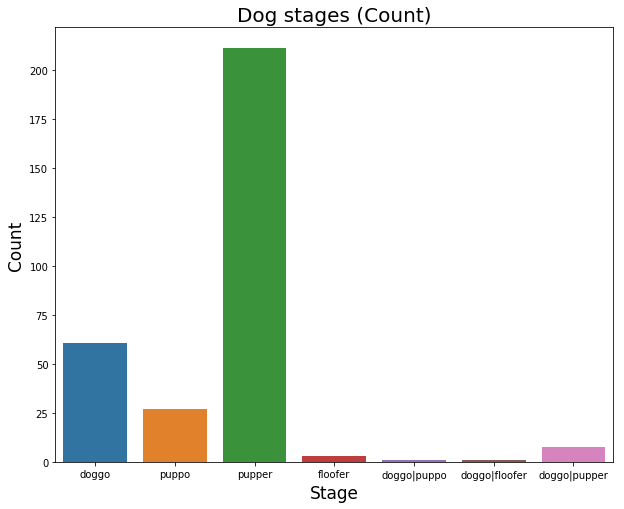

In [5]:
plt.figure(figsize = (10,8))
ax = sns.countplot(data=df, x='stage')
ax.set_title('Dog stages (Count)', fontsize = 20)
plt.xlabel("Stage",fontsize=17)
plt.ylabel("Count", fontsize=17)

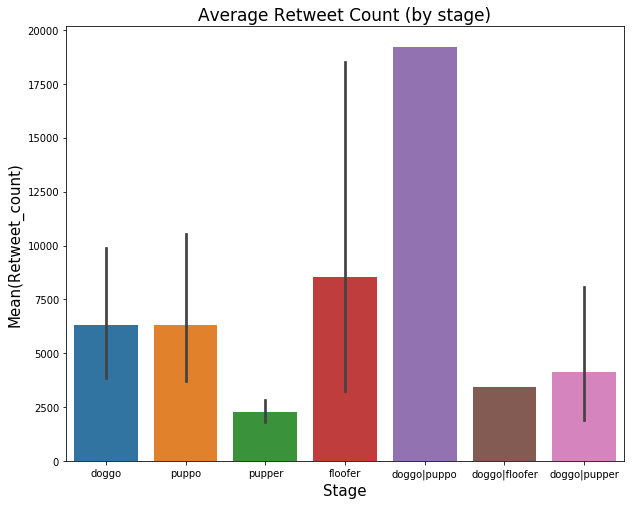

In [6]:
p=sns.barplot(data=df, x='stage', y='retweet_count')
p.set_title('Average Retweet Count (by stage)', fontsize = 17)
plt.xlabel("Stage",fontsize=15)
plt.ylabel("Mean(Retweet_count)", fontsize=15)
p.figure.set_size_inches(10,8)

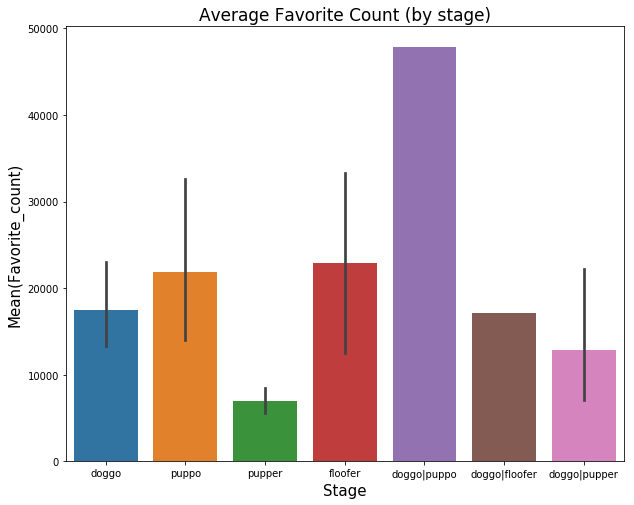

In [7]:
p=sns.barplot(data=df, x='stage', y='favorite_count')
p.set_title('Average Favorite Count (by stage)', fontsize = 17)
plt.xlabel("Stage",fontsize=15)
plt.ylabel("Mean(Favorite_count)", fontsize=15)
p.figure.set_size_inches(10,8)

Looking at the plots above, we note the following:

1. The pupper stage has the highest count where the (doggo|floofer) and (doggo|puppo) has the lowest count.

2. The average retweet_count for (doggo|puppo) is the highest (greater than 17,500 retweets), where the average retweet_count for the pupper is the lowest (less than 2,500). 

3. Similarly, the average favorite_count for (doggo|puppo) stage has the highest average favorit_count, where the pupper has the lowest average favorite count.

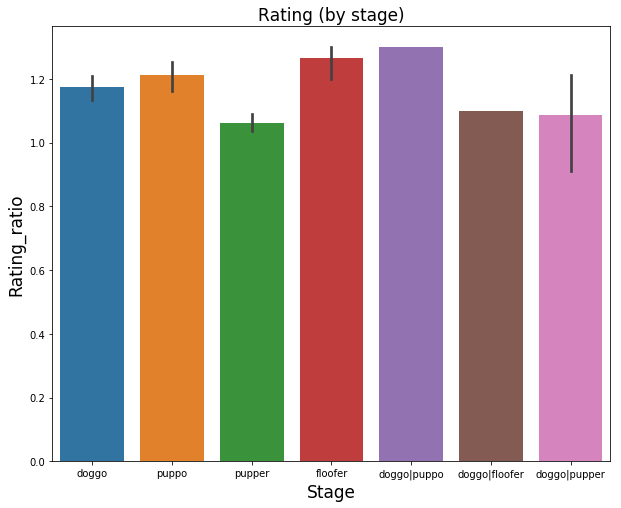

In [8]:
p=sns.barplot(data=df, x='stage', y='rating_ratio')
p.set_title('Rating (by stage)', fontsize = 17)
plt.xlabel("Stage",fontsize=17)
plt.ylabel("Rating_ratio", fontsize=17)
p.figure.set_size_inches(10,8)

Looking at the plot above, we note the doggo|puppo stage has the highest average rating where the pupper stage has the lowest rating.

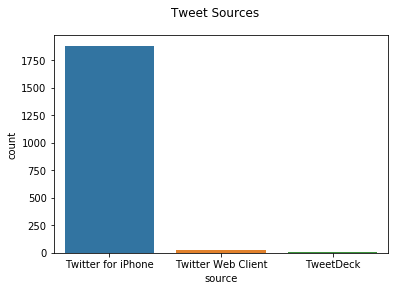

In [9]:
p = sns.countplot(data=df, x='source')
p.figure.suptitle('Tweet Sources');

In [10]:
pd.crosstab(df.source,df.stage, margins=True)

stage,doggo,doggo|floofer,doggo|pupper,doggo|puppo,floofer,pupper,puppo,All
source,,,,,,,,
TweetDeck,1,0,0,0,0,1,0,2
Twitter Web Client,1,0,0,0,0,1,0,2
Twitter for iPhone,59,1,8,1,3,209,27,308
All,61,1,8,1,3,211,27,312


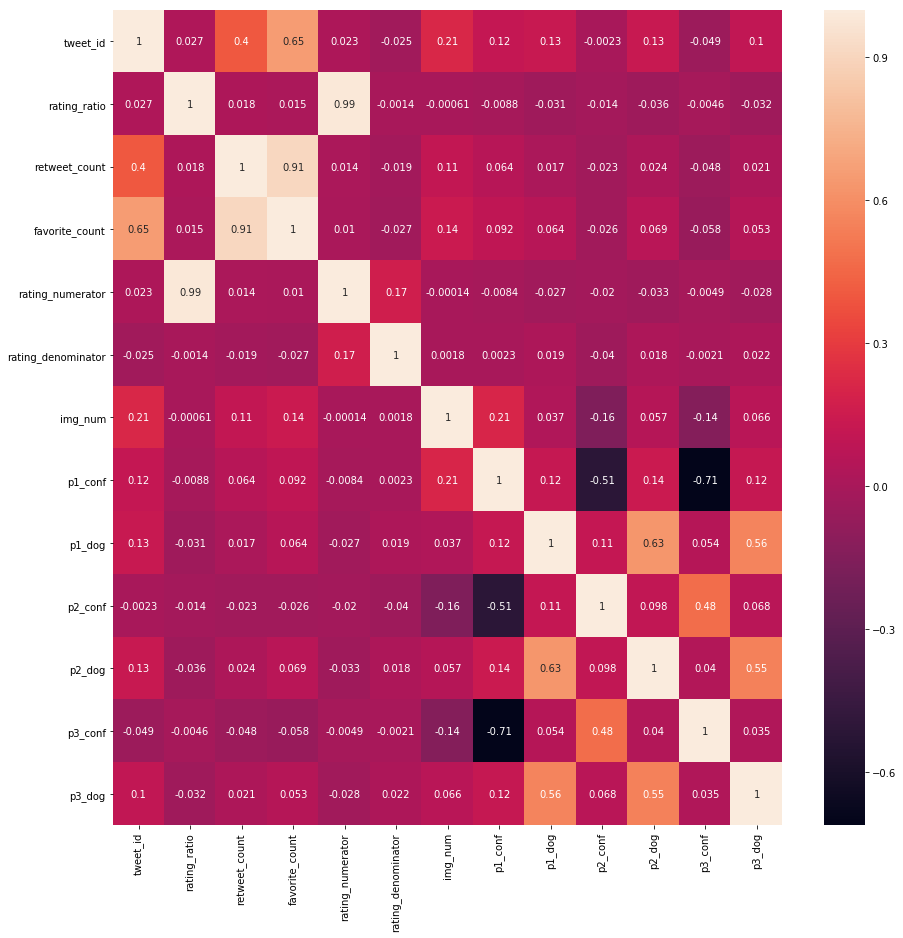

In [11]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, ax=ax);

Looking at the heatmap above, we note the following:

1. There is a strong positive correlation (0.92) between `favorite_count` and `retweet_count` which support our observation above.

2. There is a strong positive correlation (0.92) between `rating_ratio` and `rating_numerator` which is given (rating_ratio is based on the rating_numerator and rating denominator)

3. There is a relatively strong negative correlation (-0.71) between `p3_conf` and `p1_conf` which is interesting as different predictions may have opposing confidence levels. 